# A5 Statistical Analyses of Clinical Datasets

#### Welcome to A5! Please enter answers to the questions in the specified Markdown cells below, and complete the code snippets in the associated Python files as specified. When you are done with the assignment, follow the instructions at the end of this assignment to submit.

### Learning Objective 🌱
In this assignment, you will work with a dataset that we have prepared for you using a process similar to what you did in A3 and A4. The dataset describes patients from the [MIMIC III database](https://mimic.physionet.org/mimictables/patients/) who were put on mechanical ventilation and were stable for 12 hours. Some of these patients then experienced a sudden and sustained drop in oxygenation, while others did not. You will practice using common time-saving tools in the **Pandas 🐼** library, the **NumPy 🔢** library, the **sklearn 🔬** library, and **Python 🐍** programming language that are ideally suited to these tasks.

### Resources 📖
- Pandas Cheat Sheet 🐼: [https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)



### Environment Set-Up 🐍
To begin, we will need to set up an virtual environment with the necessary packages. A virtual environment is a self-contained directory that contains a Python interpreter (aka Python installation) and any additional packages/modules that are required for a specific project. It allows you to isolate your project's dependencies from other projects that may have different versions or requirements of the same packages.

In this course, we require that you utilize [Miniconda](https://docs.conda.io/en/latest/miniconda.html) to manage your virtual environments. Miniconda is a lightweight version of [Anaconda](https://www.anaconda.com/), a popular Python distribution that comes with many of the packages that are commonly used in data science.

#### Instructions for setting up your environment using Miniconda:
1. If you do not already have Miniconda installed, download and install the latest version for your opperating system from the following link: [https://docs.conda.io/en/latest/miniconda.html#latest-miniconda-installer-links](https://docs.conda.io/en/latest/miniconda.html#latest-miniconda-installer-links)

2. Create a new virtual environment for this assignment by running the following command in your terminal:

   ```bash
   conda env create -f environment.yml
   ```

   This will create a new virtual environment called `biomedin215`

3. Activate your new virtual environment by running the following command in your terminal:

   ```bash
   conda activate biomedin215
   ```

   This will activate the virtual environment you created in the previous step.

4. Finally, ensure that your `ipynb` (this notebook)'s kernel is set to utilize
the `biomedin215` virtual environment you created in the previous steps. Depending on
which IDE you are using to run this notebook, the steps to do this may vary.


In [1]:
# Run this cell: 
# The lines below will instruct jupyter to reload imported modules before 
# executing code cells. This enables you to quickly iterate and test revisions
# to your code without having to restart the kernel and reload all of your 
# modules each time you make a code change in a separate python file.

%load_ext autoreload
%autoreload 2

In [2]:
# Run this cell to ensure the environment is setup properly
import pandas as pd
import numpy as np
import os
import warnings

print("Sanity check: Success")

Sanity check: Success


### *Note to Students:* 📚

>Throughout the assignment, we have provided `sanity checks`: small warnings that will alert you when your implementation is different from the solution. Our goal in providing these numbers is to help you find bugs or errors in your code that may otherwise have gone unnoticed. Please note: the sanity checks are just tools we provided to be helpful, and should not be treated as a target to hit. We manually grade each assignment based on the code you submit, and not based on whether you get the exact same numbers as the sanity checks.

If you are failing the sanity checks (even by a lot) and your implementation is correct with minor errors, you will still receive the majority of the points (if not all the points).

In [3]:
# Run this cell to set up sanity checks warnings
# Note: You do not need to change anything in this cell

# Creates a custom warning class for sanity checks
class SanityCheck(Warning):
    pass

# Sets up a cosutom warning formatter
def custom_format_warning(message, category, filename, lineno, line=None):
    if category == SanityCheck:
        # Creates a custom warning with orange text
        return f'\033[38;5;208mSanity Check - Difference Flagged:\n{message}\033[0m\n'
    
    return '{}:{}: {}: {}\n'.format(filename, lineno, category.__name__, message)

# Sets the warning formatter for the entire notebook
warnings.formatwarning = custom_format_warning

---

### Data Description 📂

We will be utilizing the same subset of the [MIMIC III database](https://mimic.mit.edu/docs/iii/about/) we utilized starting in A2: the 1,000 subject development cohort you created previously. You will start with a dataset very similar to what you may have generated at the end of the prior assignment.

You will analyze the available data to identify a cohort of patients that underwent septic shock during their admission to the ICU. **All of the data you need for this assignment is available on Canvas.** 

Once you have downloaded and unzipped the data, you should see the following `3` csv files:
- `patient_feature_matrix.csv`

- `cohort.csv`

- `feature_descriptions.csv`

**Specify the location of the folder containing the data in the following cells:**

In [4]:
# Specify the path to the folder containing the data files
data_dir = "./A5_data/" # <-- TODO: You will need to change this path

In [5]:
# Run this cell to make sure all of the files are in the specified folder
expected_file_list = ["patient_feature_matrix.csv", "cohort.csv", "feature_descriptions.csv"]

for file in expected_file_list:
    assert os.path.exists(os.path.join(data_dir, file)), "Can't find file {}".format(file)

print("All files found!")

All files found!


In [6]:
# Run this cell to load the data from the CSV files into Pandas DataFrames
patient_feature_matrix = pd.read_csv(os.path.join(data_dir, "patient_feature_matrix.csv"))
cohort = pd.read_csv(os.path.join(data_dir, "cohort.csv"))
feature_descriptions = pd.read_csv(os.path.join(data_dir, "feature_descriptions.csv"))

##### `Important note to students:`
You may notice that some of the various features appear to have multiple versions (ex. `icd9_AORTIC_DISSECTION_A` and `icd9_AORTIC_DISSECTION_B`). For the purposes of this assignment, we have done some simplification in preprocessing the data to make it easier for you to work with. In the future, it is important to keep in mind that healthcare datasets are notoriusly messy and often require a lot of preprocessing before they are ready to be used for analysis.

In [7]:
# Run this cell to see the first three rows of the patient feature matrix
print("Patient Feature Matrix")
display(patient_feature_matrix.head(3))

Patient Feature Matrix


,subject_id,death_in_stay,oxy_drop,gender,age_in_days,icd9_ADENOID_CYSTIC_CARCINOMA_SDA,icd9_INTRACTABLE_EPILEPSY_SDA,icd9_AORTIC_DISSECTION,icd9_TIA_IV_HEPARIN,icd9_ETT_CATH,...,chartvalue_815,chartvalue_821,chartvalue_824,chartvalue_825,chartvalue_828,chartvalue_829,chartvalue_833,chartvalue_837,chartvalue_861,chartvalue_87
0,91,died,stable,F,29809.000000,0,0,0,0,0,...,1.50000,1.700000,14.800000,42.400000,77.000000,3.900000,3.040000,144.000000,6.50000,15.0
1,106,died,oxy_drop,M,10358.333333,0,0,0,0,0,...,1.40027,2.600000,14.755973,35.507768,226.000000,3.700000,5.600000,136.000000,26.00000,11.0
2,111,survived,oxy_drop,F,24388.979167,0,0,0,0,0,...,1.40027,2.012763,12.200000,53.500000,208.493109,4.101856,3.535677,139.220795,12.65352,13.0


In [8]:
# Run this cell to see the first three rows of the cohort DataFrame
print("Cohort")
display(cohort.head(3))

Cohort


,subject_id,icustay_id,death_in_stay,deathtime,censor_time,index_time,exposure_time,oxy_drop
0,91,256972,died,2177-05-10 15:16:00,2177-05-10 15:16:00,2177-05-08 00:00:00,NaN,stable
1,106,252051,died,2192-08-15 21:15:00,2192-08-15 21:15:00,2192-08-10 08:00:00,2192-08-14 16:33:00,oxy_drop
2,111,254245,survived,NaN,2142-05-05 11:45:00,2142-04-24 23:30:00,2142-04-25 18:32:00,oxy_drop


In [9]:
# Run this cell to see the first three rows of the feature descriptions DataFrame
print("Feature Descriptions")
display(feature_descriptions.head(3))

Feature Descriptions


,feature,feature_type,code,description
0,oxy_drop,engineered,NaN,sustained drop in oxygenation after stable ven...
1,gender,demographic,NaN,gender
2,age_in_days,demographic,NaN,age in days


In [10]:
# (OPTIONAL TODO:) It is always a good idea to filter out columns that you don't need from DataFrames.
# As always, feel free to add code to your notebooks to do this. This is not required for the assignment.
# You may want to come back to this later when you are more familiar with the data and know which columns you need.

# `1` (`5 points`) Preprocessing

## `1.1`: (`1 points`) Create the Feature Matrix and Outcome Vector

As you may have noticed above, the `death_in_stay` labels and features are all included together inside of the `patient_feature_matrix.csv` file. Let's split the patient_feature_matrix up into two numpy arrays.

Implement the `split_labels_and_features` function in `preprocessing.py`. When you are finished, run the following cell.

In [11]:
from src.preprocessing import split_labels_and_features

# Run this cell to split the labels from the features
features, labels = split_labels_and_features(patient_feature_matrix,
                                             {"oxy_drop": {"stable": 0, "oxy_drop":1},
                                              "death_in_stay": {"survived": 0, "died": 1},
                                              "gender": {"M":0, "F": 1}})

# Sanity Check shapes
if features.shape[0] != labels.shape[0]:
    warnings.warn("Number of rows in features and labels don't match", SanityCheck)

if features.shape[1] != patient_feature_matrix.shape[1] - 2:
    warnings.warn("Number of columns in features is incorrect", SanityCheck)

if labels.shape[1] != 1:
    warnings.warn("Number of columns in labels is incorrect", SanityCheck)

# Sanity Check indices
if not features.index.name == "subject_id":
    warnings.warn("Index name is incorrect", SanityCheck)

if not labels.index.name == "subject_id":
    warnings.warn("Index name is incorrect", SanityCheck)

##### `Important note to students:`

It's worth noting that the definition of `gender` in the `MIMIC-III` database and many other clinical databases is a simplified representation of gender that does not account for a range of gender identities and expressions, and most often isn't distinguished from biological sex which may or may not reflect an individual's self-identified gender identity (SIGI). Increasingly, EHR schemas are updated/designed to capture SIGI in addition to biological sex to improve care for transgender and gender nonconforming (TGNC) patients.

As you continue your journey in medical data science, remember that it is critically important to always review the schema of the dataset you are working with to ensure that you know how different data fields are defined, so that you can fully understand the assumptions and limitations of your downstream analysis.

## `1.2` (`4 points`) Removing Uninformative Features

Before we do any modeling, let's cut down on our feature space by removing `low-variance features` that probably aren't useful enough to measure association with or use in a predictive model. 

Implement the function `feature_variance_threshold` in `preprocessing.py`. When you are finished, run the following cell.

In [12]:
from src.preprocessing import feature_variance_threshold

# Run this cell to remove features with low variance
filtered_features = feature_variance_threshold(features, freq_cut=95/5, unique_cut=0.1)

**Report how many of each different kind of feature are left after filtering out the near-zero variance features. As a sanity check, look at the kinds of features that are over-represented or under-represented in this set relative to the full set of features. Provide a brief plausible explanation of what you observe.**

In [13]:
# TODO: Use this cell to implement any code needed to answer this writen question
# HINT: It may be helpful to create a dataframe that contains the feature_type
# of the features in the features and filtered_features DataFrames by merging with
# the feature_descriptions DataFrame.
# This will allow you to easily compare which type of features were removed.

df_features = feature_descriptions.copy()
df_features['kept'] = df_features['feature'].isin(filtered_features.columns)
print('Removed feature_type: ', df_features[~df_features['kept']]['feature_type'].value_counts())
print('Kept feature_type: ', df_features[df_features['kept']]['feature_type'].value_counts())

Removed feature_type:  feature_type
chartindicator    1010
icd9               489
note CUI           428
chartvalue           3
Name: count, dtype: int64
Kept feature_type:  feature_type
chartindicator    335
note CUI          122
chartvalue         48
demographic         2
engineered          1
Name: count, dtype: int64


<span style="color:blue;"> 
Overall, the largest subset of removed features are of chartindicator type, where 1010/1345 features are removed. All ICD9 features are removed, as we can see that it is not found in the kept feature_types. Following these 2 types, note CUI type features also have more removed than kept features. Very few chartvalue features are filtered out (3/51) and all demographic and engineered features are kept, hence they are the 3 most overrepresented features, while the chartindicator, note CUI and icd9 features are under-represented relative to the full set of original features. 

The chartindicator, icd9 and note CUI features are one-hot encoded features where they each represents occurrence/frequency/average of 1 kind of chartevent/diagnoses/note keyword. Many chartevent/diagnoses/note keyword only occurs in 1 or very few patients, hence create very low variance and do not pass the frequency/unique value cutoffs (few outliers and most patient have same values for those features that are not very informative for predictive models). 

 </span>

# `2` (`55 points`) Associative Analyses

Associative analysis revolves around the concept of finding associations or patterns between features and outcomes. In biomedical data science, this approach can uncover hidden relationships between different medical conditions, drugs, genetic variations, or other biomedical entities, which can prove invaluable in research and clinical decision-making.

It's important to keep in mind that data science can help us find patterns, but we must always approach our results critically, as considering the broader clinical and biological context is essential to understanding the significance of our findings. Let's try to find some interesting associations in our dataset!

## `2.1` (`12 points`) Hypothesis Testing

Hypothesis testing is a cornerstone of statistical inference, allowing researchers to determine if there's enough evidence in a sample of data to infer that a particular condition holds for a larger population. In biomedical data science, this method is essential for validating the significance of findings, be it in clinical trials, genomic studies, or other investigations. If you are unfamiliar with hypothesis testing, we recommend that you review the following video: [StatsQuest - Hypothesis Testing](https://youtu.be/0oc49DyA3hU)

### Types of Hypothesis Tests
#### Tests for one random variable
- Continuous
    **One-sample t-test:**: If you want to test if the mean of a single sample is different from a specified value (usually a known mean).
- Discrete
    **Chi-squared ($\chi^2$) test:** Tests if the proportion of categorical outcomes is equal to a specified value.

#### Tests for two random variables
- One continuous variable vs one discrete variable with 2 levels $^*$

    - **For independent samples: Two-sample t-test:** *aka independent t-test*, used to determine whether there is a statistically significant difference between the means of two independent groups.

    - **For independent but small samples: Wilcoxon-Mann-Whitney test:** used to determine whether two independent samples come from the same distribution. (non-parametric alternative to the two-sample t-test)

    - **For paired samples: Paired t-test:** *aka dependent t-test*, used to determine if there is a statistically significant mean difference between two sets of paired or related observations.

    - **For paired but small samples: Wilcoxon signed-rank test:** used to determine whether two dependent samples come from the same distribution. (non-parametric alternative to the paired t-test)

    
- One continuous variable vs one discrete variable with > 2 levels $^*$
    - **One-way ANOVA**: used to determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups.
    
    <br>

- One discrete variable vs one discrete variable
    - **For r-level vs c-level: r x c contingency table Chi-squared test for independence:** used to determine if there's an association or relationship between two categorical variables where one variable has r levels and the other has c levels.

    - **For 2-level vs 2-level but small counts: Fisher's exact test:** similar to the Chi-squared test for a 2x2 contingency table, but used when the sample sizes are small (usually when the expected count/frequency in any cell of the table is less than 5)
    
    - **For paired samples - McNemar's test:** used for 2x2 contingency tables with paired or matched data. A classic example is when patients are observed before and after a treatment, and the response is dichotomous (e.g., "improved" or "not improved").

- One continuous variable vs one continuous variable:
    - **Correlation/simple linear regression:** used to determine if there is a relationship between two continuous variables.

#### Tests for more than two random variables
- One discrete vs one discrete vs one continuous:
    - **Two-way ANOVA:** used to determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups that have been split on two factors (i.e., independent variables).
    
    <br>

- One continuous vs many - **multiple linear regression**

- One discrete vs many - **logistic regression**



$^*$ Note: In statistics, the term `level` when referring to a discrete variable typically means a distinct value or category that the variable can assume.


> Credit: The above write up was adapted for this assignment from Lexin Li's 2016 Big Data course at the University of California Berkeley.

### `2.1.1` (`10 points`) Statistical Tests of Differences Between Two Groups

**For the each of the following features, use a `t-test`, `rank-sum test`, `Fisher exact test`, or a `Chi-squared test` (whichever is appropriate) to determine if there is a statistically significant association between the feature and the `death_in_stay` outcome. Write your reasoning for determining which kind of test to use. If multiple tests are applicable to a comparison, choose one and explain why you chose it.**

> NOTE: Make sure you read the documentation for the test functions. Statistical testing functions can be counter intuitive to use, and may produce and incorrect result if used incorrectly.

> Hint: It may be helpful to first create two new dataframes, one of patients who died in the ICU and one of patients who did not die in the ICU. Remember that you can add additional code cells to this notebook if needed.

Continuous + discrete 

t-test: test if there is statistical diff between 2 sample means - parametric 

rank-sum (mannwhitneyu) / Wilcoxon signed-rank test: used to determine whether two dependent samples come from the same distribution. (non-parametric alternative to the paired t-test) 

2 discretes

Fisher exact test: similar to the Chi-squared test for a 2x2 contingency table, but used when the sample sizes are small (usually when the expected count/frequency in any cell of the table is less than 5) used to determine if there's an association or relationship between two categorical variables where one variable has r levels and the other has c levels. 

Chi-squared: used to determine if there's an association or relationship between two categorical variables where one variable has r levels and the other has c levels.

In [14]:
# Run this cell to import the test functions.
# Utilize one of the following imported functions in your answers below:
from scipy.stats import ttest_ind, fisher_exact, chi2_contingency, mannwhitneyu

# NOTE: for Rank Sum Tests use mannwhitneyu

# NOTE: For some of the functions above, you can pass series of labels and features. Others
# require you to pass the tables of counts. You may find the function pd.crosstab() useful for
# certain functions.

#### `alarms` (chartindicator_1622)

In [15]:
# TODO: Implement the test here. Display both the test statistic and p-value
feature_name = 'chartindicator_1622'
sample_death_in_stay = labels['death_in_stay'].to_numpy()
sample_feature = filtered_features[feature_name].to_numpy()

print(np.var(sample_death_in_stay), np.var(sample_feature))

0.14909493780904368 29.000667251681215


<Axes: >

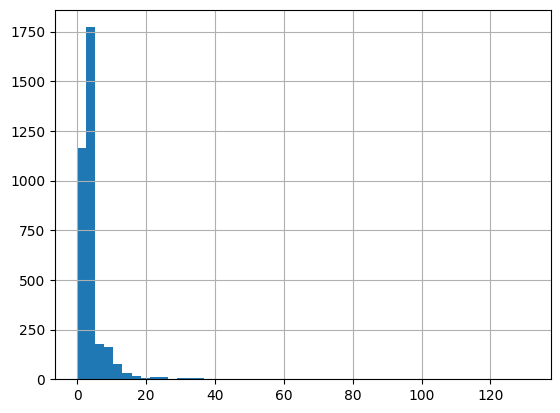

In [16]:
filtered_features[feature_name].hist(bins=50)

In [17]:
# TODO: Implement the test here. Display both the test statistic and p-value
mannwhitneyu(x=sample_death_in_stay, y=sample_feature)

MannwhitneyuResult(statistic=1784737.5, pvalue=0.0)

**Which test did you utilize for the `alarms` feature? Why?**

<span style="color:blue;"> 

Rank sum test is chosen as it is an appropriate test for 1 discrete variable (death_in_stay) and 1 continuous variable (alarms) where the variable do not follow a normal distribution. As shown from histogram plot above, the feature is not normally distributed. Although t-test could also be used for continuous vs. discrete values, it is parametric and assumes a normal distribution in variables. 

Null hypothesis in Mann-Whitney U test is that the distribution underlying sample x is the same as the distribution underlying sample y. It is often used as a test of difference in location between distributions. In this case, by setting alpha = 0.05, we observe that our p-value 0.0 hence this means the null hypothesis is rejected. There is sufficient evidence that the distributions of alarms and death_in_stay are sufficiently different. 

 </span>

#### `activity` (chartindicator_31)

In [18]:
# TODO: Implement the test here. Display both the test statistic (or the odds ratio) and p-value

feature_name = 'chartindicator_31'
sample_death_in_stay = labels['death_in_stay'].to_numpy()
sample_feature = filtered_features[feature_name].to_numpy()

print(np.var(sample_death_in_stay), np.var(sample_feature))

0.14909493780904368 51.70580642999408


<Axes: >

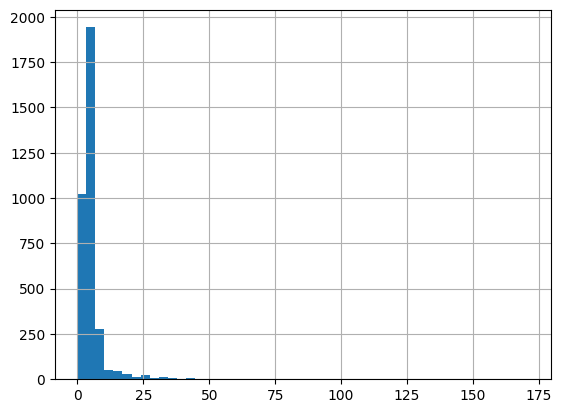

In [19]:
filtered_features[feature_name].hist(bins=50)

In [20]:
mannwhitneyu(x=sample_death_in_stay, y=sample_feature)

MannwhitneyuResult(statistic=141175.0, pvalue=0.0)

**Which test did you utilize for the `activity` feature? Why?**

<span style="color:blue;">
Similar to alarms, the activity feature is also continuous and not normally distributed, hence the same rank sum test is used. In this result, the p-value is also 0 indicating that the death_in_stay and activity feature distributions are not the same distribution.  
 </span>

#### `respiratory rate` (chartvalue_618)

In [21]:
# TODO: Implement the test here. Display both the test statistic and p-value

feature_name = 'chartvalue_618'
sample_death_in_stay = labels['death_in_stay'].to_numpy()
sample_feature = filtered_features[feature_name].to_numpy()

print(np.var(sample_death_in_stay), np.var(sample_feature))

0.14909493780904368 32.71901167144023


<Axes: >

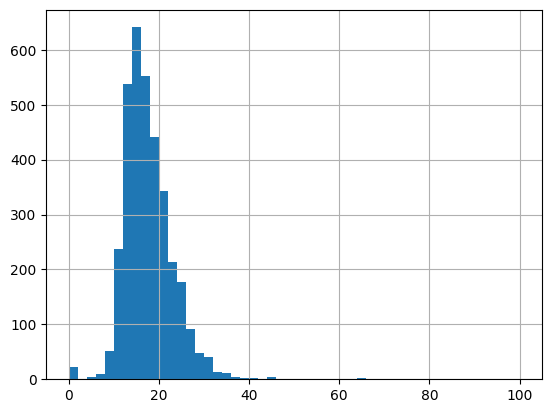

In [22]:
filtered_features[feature_name].hist(bins=50)

**Which test did you utilize for the `respiratory rate` feature? Why?**


In [23]:
ttest_ind(a=sample_death_in_stay, b=sample_feature)

TtestResult(statistic=-172.5583732996364, pvalue=0.0, df=6908.0)

<span style="color:blue;"> 

As observed from the histogram above, the respiratory rate data generally follows normal distribution, hence independent t-test is selected. 

Null hypothesis in t-test is that population mean of dataset 1 and 2 are equal. In this case, by setting alpha = 0.05, we observe that our p-value is 0 hence this means the null hypothesis is rejected. There is sufficient evidence that the means of respiratory rate and death_in_stay are sufficiently different. 

 </span>

#### `Arterial PaCO2` (chartvalue_778)

In [24]:
# TODO: Implement the test here. Display both the test statistic and p-value

feature_name = 'chartvalue_778'
sample_death_in_stay = labels['death_in_stay'].to_numpy()
sample_feature = filtered_features[feature_name].to_numpy()

print(np.var(sample_death_in_stay), np.var(sample_feature))

0.14909493780904368 55.393830864965196


<Axes: >

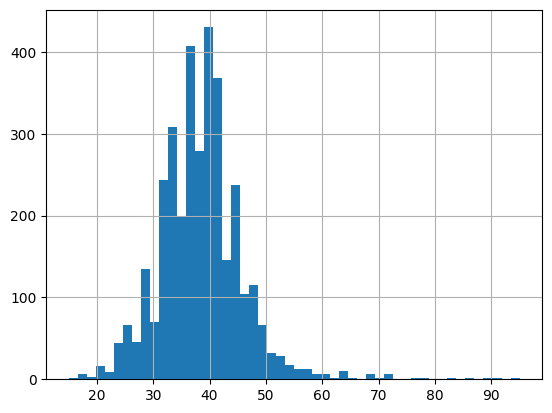

In [25]:
filtered_features[feature_name].hist(bins=50)

In [26]:
ttest_ind(a=sample_death_in_stay, b=sample_feature)

TtestResult(statistic=-301.59052141368346, pvalue=0.0, df=6908.0)

**Which test did you utilize for the `arterial PaCO2` feature? Why?**

<span style="color:blue;"> 
As observed from the histogram above and similar to the respiratory rate data, arterial PaCO2 also generally follows normal distribution, hence independent t-test is selected. 

Null hypothesis in t-test is that population mean of dataset 1 and 2 are equal. In this case, by setting alpha = 0.05, we observe that our p-value is 0 hence this means the null hypothesis is rejected. There is sufficient evidence that the means of arterial PaCO2 and death_in_stay are sufficiently different. 

 </span>

#### `Oxygen Desaturation` (oxy_drop)

In [27]:
# TODO: Implement the test here. Display both the test statistic and p-value

feature_name = 'oxy_drop'
sample_death_in_stay = labels['death_in_stay'].to_numpy()
sample_feature = filtered_features[feature_name].to_numpy()

print(np.var(sample_death_in_stay), np.var(sample_feature))

0.14909493780904368 0.20218404501959236


In [28]:
filtered_features[feature_name].value_counts()

oxy_drop
0    2483
1     972
Name: count, dtype: int64

In [29]:
labels['death_in_stay'].value_counts()

death_in_stay
0    2825
1     630
Name: count, dtype: int64

In [30]:
data_crosstab = pd.crosstab(filtered_features[feature_name],  
                            labels['death_in_stay'], margins = False)

In [31]:
data_crosstab

death_in_stay,0,1
oxy_drop,,
0,2092,391
1,733,239


In [32]:
fisher_exact(data_crosstab, alternative='two-sided')

SignificanceResult(statistic=1.7445316343513502, pvalue=3.570818717565323e-09)

**Which test did you utilize for the `oxy_drop` feature? Why?**
**Was the association statistically significant?**

<span style="color:blue;"> 

oxy_drop data is categorical (0 or 1), hence one of fisher exact test or Chi-squared test should be used. Chi-squared is more appropriate when contingency matrix is bigger than 2x2, while fisher exact test is usually used for when we have a 2x2 contingency matrix. As both death_in_stay and oxy_drop are categorical variables with 2 categories (0 or 1), we pick fisher exact test. 

By setting alpha = 0.05, the p-value is way smaller than alpha hence the null hypothesis should be rejected, and that the 2 variables have statistical significant association. The null hypthesis in fisher's exact test asserts that there is no association or no difference between the two categorical variables being studied. 

 </span>

#### `snomed ct concept C2720507` (C2720507)

In [33]:
# TODO: Implement the test here. Display both the test statistic and p-value

feature_name = 'C2720507'
sample_death_in_stay = labels['death_in_stay'].to_numpy()
sample_feature = filtered_features[feature_name].to_numpy()

print(np.var(sample_death_in_stay), np.var(sample_feature))

0.14909493780904368 0.04886527422033548


In [34]:
filtered_features[feature_name].value_counts()

C2720507
1    3277
0     178
Name: count, dtype: int64

In [35]:
labels['death_in_stay'].value_counts()

death_in_stay
0    2825
1     630
Name: count, dtype: int64

In [36]:
data_crosstab = pd.crosstab(filtered_features[feature_name],  
                            labels['death_in_stay'], margins = False)
data_crosstab

death_in_stay,0,1
C2720507,,
0,147,31
1,2678,599


In [37]:
fisher_exact(data_crosstab, alternative='two-sided')

SignificanceResult(statistic=1.0606494976992942, pvalue=0.8422468738873531)

**Which test did you utilize for the `C2720507` feature? Why?**


<span style="color:blue;"> 

Similar to oxy_drop data, C2720507 feature is categorical (0 or 1) and 2-level and contingency matrix is 2x2 between this feature and death_in_stay, where fisher exact test is used. 

By setting alpha = 0.05, the p-value of 0.84 is larger than alpha hence the null hypothesis should not be rejected. The null hypthesis in fisher's exact test asserts that there is no association or no difference between the two categorical variables being studied, which suggests that feature C2720507 does not show sufficient evidence that it is associated with death_in_stay label. 

 </span>

### `2.1.2` (`2 points`) Hypothesis Testing with the Bonferroni Correction

Generally, when we perform hypothesis tests, we are attempting to determine if a particular effect or difference is statistically significant. We usually use a significance level, often denoted as α (alpha), to make this determination. A common choice for α is 0.05, meaning that there is a 5% chance of incorrectly rejecting the null hypothesis (a Type I error) when it is actually true.

However, when we conduct multiple hypothesis tests simultaneously – for example, when we are testing multiple variables or conditions at once – the likelihood of encountering at least one Type I error (i.e., finding at least one "significant" result when there actually is none) increases with the number of tests. This phenomenon is due to the accumulated risk from each individual test.

To address this problem, the Bonferroni correction is often employed. The Bonferroni correction is a simple method to control the familywise error rate (FWER), which is the probability of making one or more Type I errors in a set of comparisons.

To apply the correction, simply divide the desired α level by the number of tests being performed. For example, if we are performing 20 tests and want to maintain an overall α level (significance threshold) of 0.05, we would use an adjusted α level of 0.05/20 = 0.0025 for each individual test.

$\alpha_{adjusted} = \frac{\alpha_{desired}}{n_{tests}}$

We should note that the Bonferroni correction is a very conservative method, meaning that it is likely to produce false negatives (i.e., not catching real associations because we fail to reject the null hypothesis when it is actually false). However, it is a simple and effective way to control the familywise error rate (FWER), and is often used as a baseline for comparison with other methods.

Implement the function `calc_bonferroni` and `multi_ttest` in `associative_analysis.py`. When you are finished, run the following cell.

In [38]:
from src.hypothesis import multi_ttest

multi_test_results, sig_columns = multi_ttest(filtered_features, labels, column_substring="chartvalue", alpha=0.05)

**How many of the chartvalue features are statistically significant after applying the Bonferroni correction?**

In [39]:
# TODO: Use this cell the answer the written question above
len(sig_columns), len([col for col in filtered_features.columns if 'chartvalue' in col])

(48, 48)

<span style="color:blue;"> 
All chartvalue features are found to have statistically significant difference (rejecting null hypothesis that the distributions of the 2 variables are the same) after applying Bonferroni correction. 

 </span>

## `2.2` (`20 points`) Regression Analysis

Regression analyses model the relationship between a dependent variable (often denoted as Y) and an independent variable (often denoted as X). In biomedical data science, regression analyses are often used to predict a patient's risk of developing a particular condition or experiencing a particular outcome based on their clinical data. Let's take a look at some of the simpliest forms of regression analysis: linear regression.

Simple Linear Regression: Involves one dependent and one independent variable. The relationship is modeled as a linear equation, where the estimated dependent variable (Y) is a linear combination of the independent variable (X) and a constant known as the intercept.

$Y = \beta_0 + \beta_1 X + \epsilon$

Here, $\beta_0$ is the intercept, $\beta_1$ is the coefficient for X, and $\epsilon$ is the error term. The error term accounts for the variability in Y that cannot be explained by the linear relationship with X. The goal of linear regression is to find the values of $\beta_0$ and $\beta_1$ that minimize the error term. Finding the values of $\beta_0$ and $\beta_1$ that minimize the error term is called "fitting the model" or "training the model". Once we have a fit model, we can use it to make predictions for Y given new (or unseen) values of X. The estimated value of Y (denoted as $\hat{Y}$) for any given value of X can be calculated using the following equation:

$\hat{Y} = \beta_0 + \beta_1 X$

You can also have multiple independent variables in a linear regression model. This is known as multiple linear regression. The equation for multiple linear regression is:

$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n + \epsilon$

Where $\beta_0$ is the intercept, $\beta_1$ to $\beta_n$ are the coefficients for the independent variables $X_1$ to $X_n$, and $\epsilon$ is the error term.



Another type of regression is called `Logistic Regression`. Logistic regression is generally utilized when the dependent variable (the one we are trying to predict) is a binary outcome (e.g., "yes" or "no", "died" or "survived"). Logistic regression is similar to linear regression, but instead of predicting a continuous value, it predicts a value that falls between 0 and 1, which can be interpreted as a *predicted* probability of the dependent variable taking on the value 1 (or "yes", or "died", etc.). The equation for logistic regression is:

$Y = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n + \epsilon)}}$

Where $\beta_0$ is the intercept, $\beta_1$ to $\beta_n$ are the coefficients for the independent variables $X_1$ to $X_n$, and $\epsilon$ is the error term.

**Main takeaway:**
- **Linear regression**: used to predict a **continuous** value (think: problems where you want to predict a value)

- **Logistic Regression**: used to predict a **binary** value (think: binary classification problems)


**In this part of the assignment you will build and compare several regression models to predict the binary outcome of `death_in_stay`, utilizing various features.**

### `2.2.1` (`6 points`) Regression models for association

Implement the `run_logistic_regression_model` function in `regression.py` following the implementation instructions in the docstring. When you are finished, run the following cell.


In [40]:
from src.regression import run_logistic_regression

# glm_1: A logistic regression that only utilizes the "oxy_drop" and "age_in_days" features
model_1_features = ["oxy_drop", "age_in_days"]
glm_1 = run_logistic_regression(filtered_features, labels, model_1_features)

# glm_2: A logistic regression that utilizes the "oxy_drop", "age_in_days", and "gender" features
model_2_features = ["oxy_drop", "age_in_days", "gender"]
glm_2 = run_logistic_regression(filtered_features, labels, model_2_features)

# glm_3: A logistic regression that utilizes `age_in_days`, `gender`, `oxy_drop`, 
# and all of the chart value features that were found to have statistically significant
# associations with the outcome in the previous section.
model_3_features = ["oxy_drop", "age_in_days", "gender"]
model_3_features.extend(sig_columns)
glm_3 = run_logistic_regression(filtered_features, labels, model_3_features)

### `2.2.2` (`6 points`) Comparing regression models

Now that we have fit the models, let's compare them! 


**What is the point estimate and confidence interval for the `oxy_drop` coefficient in each model?**

**Why do you think the point estimate of the coefficient changes as we add more features to the model?**

> HINT: Use the result summaries from above to answer this question.


<span style="color:blue;"> 

- Model 1: The point coefficient estimate for oxy_drop is 0.5747, while 95% confidence level for it is [0.391, 0.759]
- Model 2: The point coefficient estimate for oxy_drop is 0.5778, while 95% confidence level for it is [0.394, 0.762]
- Model 3: The point coefficient estimate for oxy_drop is 0.3260, while 95% confidence level for it is [0.112, 0.540]

As more features are added to the model, the regression fit where it tries to correlate the features and outcome will be adjusted to the additional features. When the additional features have a correlation with the outcome, the estimates for previous features are changed. 

 </span>

In [41]:
# TODO: Use this cell to answer the written question above
glm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          death_in_stay   No. Observations:                 3455
Model:                            GLM   Df Residuals:                     3452
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1590.0
Date:                Tue, 14 Nov 2023   Deviance:                       3180.1
Time:                        21:03:27   Pearson chi2:                 3.41e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02901
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.1467      0.081    -26.523      0.000      -2.305      -1.988
oxy_drop        0.5747      0.094      6.123      0.000       0.391       0.759
age_in_days  1.667e-05   1.96e-06      8.497      0.000    1.28e-05    2.05e-05
===============================================================================
"""

In [42]:
glm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          death_in_stay   No. Observations:                 3455
Model:                            GLM   Df Residuals:                     3451
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1589.8
Date:                Tue, 14 Nov 2023   Deviance:                       3179.6
Time:                        21:03:27   Pearson chi2:                 3.41e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02913
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.1707      0.089    -24.465      0.000      -2.345      -1.997
oxy_drop        0.5778      0.094      6.147      0.000       0.394       0.762
age_in_days  1.648e-05   1.98e-06      8.301      0.000    1.26e-05    2.04e-05
gender          0.0611      0.091      0.673      0.501      -0.117       0.239
===============================================================================
"""

In [43]:
glm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          death_in_stay   No. Observations:                 3455
Model:                            GLM   Df Residuals:                     3403
Model Family:                Binomial   Df Model:                           51
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1321.5
Date:                Tue, 14 Nov 2023   Deviance:                       2643.0
Time:                        21:03:27   Pearson chi2:                 3.24e+03
No. Iterations:                    11   Pseudo R-squ. (CS):             0.1688
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -77.3273     34.559     -2.238      0.025    -145.061      -9.593
oxy_drop            0.3260      0.109      2.983      0.003       0.112       0.540
age_in_days      1.752e-05   2.32e-06      7.540      0.000     1.3e-05    2.21e-05
gender             -0.0019      0.121     -0.016      0.988      -0.240       0.236
chartvalue_1126    -3.7820      3.049     -1.240      0.215      -9.758       2.194
chartvalue_1127    -0.0671      0.033     -2.019      0.043      -0.132      -0.002
chartvalue_131     -0.0001      0.006     -0.019      0.985      -0.012       0.012
chartvalue_184     -0.2170      0.098     -2.220      0.026      -0.409      -0.025
chartvalue_190      0.8765      0.619      1.416      0.157      -0.337       2.090
chartvalue_198      0.0332      0.073      0.456      0.648      -0.109       0.176
chartvalue_211     -0.0010      0.003     -0.322      0.747      -0.007       0.005
chartvalue_218      0.0114      0.009      1.272      0.203      -0.006       0.029
chartvalue_219     -0.0013      0.005     -0.262      0.793      -0.011       0.008
chartvalue_434     -0.0074      0.018     -0.409      0.683      -0.043       0.028
chartvalue_444     -0.0171      0.023     -0.737      0.461      -0.063       0.028
chartvalue_450      0.1110      0.030      3.659      0.000       0.052       0.170
chartvalue_454     -0.1903      0.081     -2.338      0.019      -0.350      -0.031
chartvalue_535      0.0135      0.017      0.774      0.439      -0.021       0.048
chartvalue_543     -0.0266      0.017     -1.572      0.116      -0.060       0.007
chartvalue_614     -0.0020      0.017     -0.116      0.908      -0.035       0.031
chartvalue_615     -0.0230      0.019     -1.224      0.221      -0.060       0.014
chartvalue_618      0.0249      0.010      2.455      0.014       0.005       0.045
chartvalue_619      0.0197      0.017      1.127      0.260      -0.015       0.054
chartvalue_631      0.0318      0.067      0.472      0.637      -0.100       0.164
chartvalue_646      0.0065      0.014      0.465      0.642      -0.021       0.034
chartvalue_677     -2.5335      1.447     -1.751      0.080      -5.369       0.302
chartvalue_678      1.4187      0.804      1.765      0.078      -0.157       2.994
chartvalue_682     -0.0006      0.001     -0.785      0.432      -0.002       0.001
chartvalue_683     -0.0021      0.001     -2.793      0.005      -0.004      -0.001
chartvalue_762     -0.0055      0.003     -1.759      0.079      -0.012       0.001
chartvalue_776     -0.0298      0.046     -0.652      0.514      -0.119       0.060
chartvalue_777     -0.0555      0.045     -1.231      0.218      -0.144       0.033
chartvalue_778      0.0136      0.031      0.434      0.664      -0.048       0.075
chartvalue_779      0.0016      0.001      2.060      0.039

**Assuming you had a model of $Y$ regressed on $X_1$ and you added the variable $X_2$, under what conditions would the coefficient for $X_1$ _not_ change?**

<span style="color:blue;"> 

When the new variable $X_2$ does not have any correlation with either the outcome $Y$ or the previous variable $X_1$ the coefficient will not change. 

</span>

**If you had a model to estimate $Y$ regressed on $X_1$, and you added the variable $X_2$, what would likely happen to the coefficient of $X_1$ if both $X_1$ and $X_2$ were positively correlated with the outcome?**

<span style="color:blue;"> 

Both variables should have a positive coefficient estimate, and when the new variable $X_2$ is added, the coefficient of $X_1$ should be smaller but still positive. 

 </span>

### `2.2.3` (`8 points`) Mean-Squared-Error (MSE)

Another way to compare models is to compare metrics such as the Mean Squared Error (MSE) and R-squared. These metrics are often used to evaluate the performance of regression models.

MSE is the average of the squared errors (the difference between the predicted value of Y and the actual value of Y). It is calculated as follows:

$MSE = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y_i})^2$


R-squared (also known as the coefficient of determination) represents the proportion of variance in the dependent variable that is explained by the independent variables in the model.

In [44]:
# Run this cell to get the R^2 and MSE values for each model
from sklearn.metrics import r2_score, mean_squared_error

# Let's compare these values for the different models
# First, let's get the predicted probabilities for each model
model_1_probs = glm_1.predict(filtered_features[model_1_features]).values
model_2_probs = glm_2.predict(filtered_features[model_2_features]).values
model_3_probs = glm_3.predict(filtered_features[model_3_features]).values

# Now, let's calculate the R^2 and MSE for each model
model_1_r2 = r2_score(labels, model_1_probs)
model_1_mse = mean_squared_error(labels, model_1_probs)
model_2_r2 = r2_score(labels, model_2_probs)
model_2_mse = mean_squared_error(labels, model_2_probs)
model_3_r2 = r2_score(labels, model_3_probs)
model_3_mse = mean_squared_error(labels, model_3_probs)

# Let's print these out
print(f"Model 1: R^2 = {model_1_r2}, MSE = {model_1_mse}")
print(f"Model 2: R^2 = {model_2_r2}, MSE = {model_2_mse}")
print(f"Model 3: R^2 = {model_3_r2}, MSE = {model_3_mse}")

Model 1: R^2 = 0.029348980226378885, MSE = 0.14471915342743286
Model 2: R^2 = 0.029308258237925267, MSE = 0.14472522486976883
Model 3: R^2 = 0.19590407370474439, MSE = 0.1198866321234965


**Which of the three models do you think has the best fit to the data we utilized? Explain your reasoning.**

<span style="color:blue;"> 

Model 3 best fit to the data, as it has the highest $R^2$ and lowest MSE. High $R^2$ means that a larger proportion of the variability in the dependent variable has been accounted for by the independent variables in the model, i.e., model is capturing the pattern of association between indepedent variables and outcome. The lower MSE is preferred as it means that the difference between model prediction to actual ground truth is smaller. 

 </span>

**If we were to use these models to predict outcomes for a group of new patients (patients the models had not seen before from a different dataset), would the same model perform the best on the new dataset as well? Explain your reasoning**

<span style="color:blue;"> 

The same model may not perform the best on new dataset, as a high $R^2$ value and low MSE here only indicates how well it fits to the trained data. Overfitting could occur where model is fitted too closely to the training data and small fluctuations/noise are also captured, making it less generalizable to test data.  

 </span>

## `2.3` (`23 points`) Survival Analysis

Survival analysis, also known as time-to-event analysis, is a branch of statistics that deals with analyzing the expected duration of time until one or more events happen. In the context of biomedical data science, these events often represent the occurrence of a particular health-related outcome, such as the onset of a disease, death, or recovery. Survival analysis is a powerful tool that can be used to answer a wide range of application areas, such as in clinical trials (to compare distributions of various treatment groups), epidemilogical studies (to identify risk factors that may influence the time to event prediction), and even patient monitoring (to predict the time to a equipment failure or a patient's discharge).

In this part of the assignment, you will perform some survival analysis on the cohort's data.

### `2.3.1` (`3 points`) Creating Survival Data

The first step of doing a survival analysis is to get our data into the appropriate format. To start, let's calculate the `survival time` for each patient. The `survival time` is the number of days between the patient's admission and the time of a particular event.

Implement the function `calc_survival_time` in `survival.py`. When you are finished, run the following cell.

In [45]:
from src.survival import calc_survival_time

# Run this cell to calculate the survival time for each patient
survival_df = calc_survival_time(cohort)


# Sanity Check
if max(survival_df["survival_time_days"]) != 172:
    warnings.warn("Max survival time is incorrect", SanityCheck)

### `2.3.2` (`13 points`) Kaplan-Meier Curves

In survival analysis, an extremely commonly utilized tool is the `Kaplan-Meier (KM) estimator`, and the associated visualization method, the `Kaplan-Meier curve`. The `Kaplan-Meier (KM) estimator` is a non-parametric* method used to estimate the `survival function` from time-to-event data, which is the probability that a particular event has not occurred yet at a given time point. The `Kaplan-Meier curve` is a graphical representation of the `survival function` over time, and is often used to compare the survival distributions of different groups.

In this part of the assignment, you will set up a function to generate a `Kaplan-Meier curve` for the cohort's data. You will then use the `Kaplan-Meier curve` to compare the survival distributions of patients who experienced a sudden drop in oxygenation (oxy_drop) to those who did not. Before we get started, let's learn a bit more about how the `Kaplan-Meier estimator` works.

The `Kaplan-Meier estimator` is a product-limit estimator, meaning that it is calculated as the product of the conditional probabilities of surviving each time interval. At each time point in our data, we need to know the following:

- $n_i$ = The number of patients who are at risk of experiencing the event at time $t_i$
- $d_i$ = The number of patients who experienced the event at time $t_i$

The `Kaplan-Meier estimator` for the survival function at time $t_i$ is calculated as the product of the probabilities for all observed time points up to and including $t_i$:

$\hat{S}(t_i) = \prod_{j: t_j \leq t_i} \frac{n_j - d_j}{n_j} = \prod_{j: t_j \leq t_i} P(T > t_j | T > t_{j-1})$

The `Kaplan-Meier curve` is a graphical representation of the `Kaplan-Meier estimator` over time. The `Kaplan-Meier curve` is a step function, where the value of the curve at each time point is equal to the value of the `Kaplan-Meier estimator` at that time point (with time on the x-axis and the `Kaplan-Meier estimator` on the y-axis).

> \* A "non-parameteric" method in statistics refers to a type of method that makes few (if any) assumptions about data. This contrasts with "parametric" methods which assume some sort of distributional form for the data. The Kaplan-Meier curve is a non-parametric method because it does not assume any particular distribution for the survival times, and **utilizes only the observed data to estimate the survival function.**

Implement the function `display_kaplan_meier_curve` in `survival.py`. When you are finished, run the following cell.

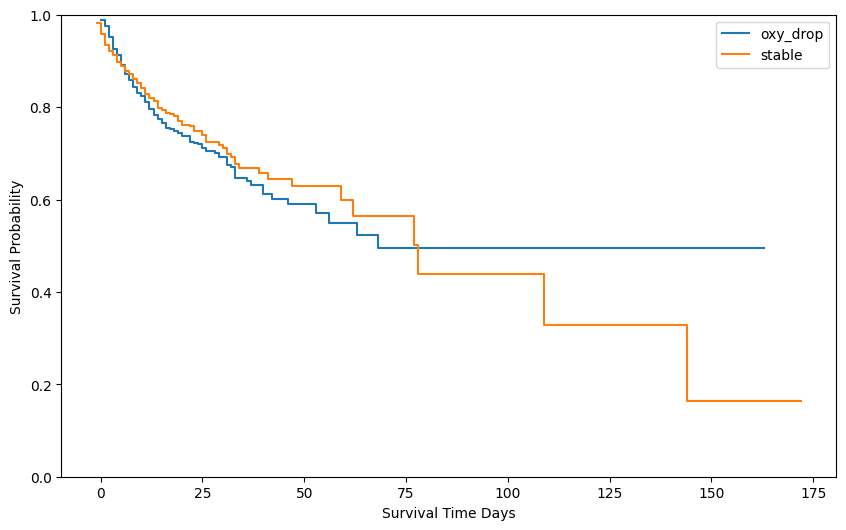

In [46]:
from src.survival import display_kaplan_meier_curve

display_kaplan_meier_curve(survival_df, "kaplan_meier_curve.png")

### `2.3.3` (`7 points`) Cox Proportional Hazards Model

Another fundamental tool of survival analysis is the `Cox Proportional Hazards Model`. The `Cox Proportional Hazards Model` is a semi-parametric* method used to model the `hazard function` from time-to-event data. The `hazard function` is the probability that a particular event occurs at a given time point, given that the event has not occurred yet. (Contrast the hazard function with the survival function we talked about above!)

The `Cox Proportional Hazards Model` is a popular tool for survival analysis because it is relatively simple to implement, and it allows us to estimate the effect of multiple variables on the `hazard function` simultaneously.

> \* A semi-parametric method is a method that includes both parametric and non-parametric components.

Here we will implement a Cox Proportional Hazards Model utilizing the `lifelines` library.

In [47]:
# Run this cell to import the CoxPHFitter class from the lifelines package.
# Use this class to fit a Cox Proportional Hazards model to the survival data.
from lifelines import CoxPHFitter

In [48]:
# Run this cell (no edits needed) to prepare the data for the cox model

# Create a survival dataframe that contains the survival time and feature columns
surv_features = filtered_features.merge(survival_df.drop(columns=["oxy_drop"]), on="subject_id").drop(columns=["subject_id"])

# Create a binary column for death event
surv_features["death_event"] = (surv_features['death_in_stay'] == 'died').astype(int)

# Remove the "death_in_stay" column
surv_features.drop(columns=["death_in_stay"], inplace=True)

Fit a Cox Proportional Hazards model using the cell below. You will need to use the `CoxPHFitter` class from the `lifelines` library. You can find the documentation for the `CoxPHFitter` class here: [https://lifelines.readthedocs.io/en/latest/fitters/regression/CoxPHFitter.html](https://lifelines.readthedocs.io/en/latest/fitters/regression/CoxPHFitter.html)



In your implementation, use `oxy_drop` as the only predictor(formula), `death_event` as the event, and `survival_time_days` as the duration.

In [49]:
# TODO: Fit a Cox Proportional Hazards model to the survival data
cph = CoxPHFitter()
cph.fit(surv_features, 'survival_time_days', 'death_event', formula='oxy_drop')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 3455 total observations, 2825 right-censored observations>
             duration col = 'survival_time_days'
                event col = 'death_event'
      baseline estimation = breslow
   number of observations = 3455
number of events observed = 630
   partial log-likelihood = -4723.03
         time fit was run = 2023-11-15 05:03:28 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
oxy_drop    0.07       1.07       0.08            -0.09             0.23                 0.91                 1.26

            cmp to    z    p   -log2(p)
covariate                              
oxy_drop      0.00 0.82 0.41       1.28
---
Concordance = 0.50
Partial AIC = 9448.05
log-likelihood ratio test = 0.67 on 1 df
-log2(p) of ll-ratio test = 1.28

**What is the point estimate and 95% confidence interval of the coefficient for `oxy_drop`?**



<span style="color:blue;"> 

The point estimate is 0.07, and the 95% confidence interval for coefficient of oxy_drop is [-0.09, 0.23]. 

 </span>

In addition, let's run another version of the model adjusted for all of the `sig_columns` (the columns known to have significant associations in `filtered_features`) AND the `oxy_drop` column. Use the same event and duration as above, and utilize the `sig_columns` and `oxy_drop` as the predictors (formula).



In [50]:
# TODO: Implement the model here
cph = CoxPHFitter()
formula_cols = sig_columns
formula_cols.append('oxy_drop')
cph.fit(surv_features, 'survival_time_days', 'death_event', formula=formula_cols)
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 3455 total observations, 2825 right-censored observations>
             duration col = 'survival_time_days'
                event col = 'death_event'
      baseline estimation = breslow
   number of observations = 3455
number of events observed = 630
   partial log-likelihood = -4468.60
         time fit was run = 2023-11-15 05:03:28 UTC

---
                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                               
chartvalue_1126  -1.77       0.17       2.70            -7.07             3.52                 0.00                33.95
chartvalue_1127  -0.06       0.94       0.03            -0.11            -0.01                 0.89                 0.99
chartvalue_131   -0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
chartvalue_184   -0.15       0.86       0.08            -0.31             0.01                 0.73                 1.01
chartvalue_190    0.80       2.24       0.47            -0.11             1.72                 0.90                 5.56
chartvalue_198   -0.00       1.00       0.06            -0.12             0.12                 0.89                 1.13
chartvalue_211   -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
chartvalue_218    0.00       1.00       0.01            -0.01             0.02                 0.99                 1.02
chartvalue_219    0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
chartvalue_434   -0.03       0.97       0.03            -0.08             0.02                 0.92                 1.03
chartvalue_444   -0.02       0.98       0.02            -0.05             0.02                 0.95                 1.02
chartvalue_450    0.07       1.07       0.02             0.03             0.11                 1.03                 1.12
chartvalue_454   -0.13       0.88       0.07            -0.26             0.00                 0.77                 1.00
chartvalue_535    0.02       1.02       0.01            -0.01             0.04                 0.99                 1.04
chartvalue_543   -0.03       0.97       0.01            -0.06            -0.00                 0.95                 1.00
chartvalue_614   -0.01       0.99       0.01            -0.04             0.02                 0.96                 1.02
chartvalue_615   -0.01       0.99       0.01            -0.04             0.02                 0.96                 1.02
chartvalue_618    0.02       1.02       0.01             0.00             0.04                 1.00                 1.04
chartvalue_619    0.00       1.00       0.01            -0.02             0.03                 0.98                 1.03
chartvalue_631   -0.01       0.99       0.05            -0.11             0.09                 0.90                 1.10
chartvalue_646   -0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
chartvalue_677   -2.63       0.07       3.56            -9.61             4.35                 0.00                77.72
chartvalue_678    1.47       4.33       1.98            -2.41             5.35                 0.09               209.82
chartvalue_682   -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
chartvalue_683   -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
chartvalue_762   -0.01       0.99       0.00            -0.01            -0.00                 0.99                 1.00
chartvalue_776   -0.05       0.95       0.04            -0.13             0.04                 0.88                 1.04
chartvalue_777   -0.02       0.98       0.05            -0.12             0.07                 0.89           

**What is the point estimate and 95% confidence interval of the coefficient for `oxy_drop` in the adjusted model?**

<span style="color:blue;"> 

The point estimate is -0.23, and the 95% confidence interval for coefficient of oxy_drop is [-0.41, -0.06]. 


 </span>

# `3` (`40 points`) Causal Analyses

In our associative analyses, we saw that we could do a reasonable job of predicting mortality, but there are many cases where having a prediction isn't as useful as understanding the underlying causal mechanisms. To improve standards of care, clinicians need to know which factors have causal relationships with mortality, so they can intervene correctly. This line of inquiry is known as **causal inference**, and it is a very active area of research in biomedical data science.

In this part of the assignment, we will explore some of the methods that can be used to infer causality from observational data. We will investigate to what extent having a sudden and sustained drop in oxygenation during ventilation (which we will refer to as the "exposure") is *causally* related to death later in the hospitalization (which we will refer to as the "outcome").

## `3.1` (`10 points`) Analyses without "Matching"

When someone refers to analyses without 'matching' in the context of causal inference, they are discussing a method of analysis where units (e.g., individuals in a study) are *not* paired or grouped based on similar characteristics or treatment propensities before estimating treatment effects. 

For this first part, let's see what kind of analysis we can do **without** matching.


### `3.1.1` (`3 points`) Univariate analysis

Univariate analysis, in a general statistical context, refers to the examination of a single variable's properties, distribution, and characteristics. However, in the context of causal inference, "univariate analysis" can be somewhat of a misnomer, given that causal inference inherently involves understanding the relationship between two or more variables: a treatment and an outcome, at minimum. 

When people refer to "univariate analysis" in the context of causal inference, they often mean examining the causal effect of one treatment on an outcome, without adjusting for potential confounders or covariates. In other words, it's a simple analysis that doesn't account for other variables that might influence the relationship between treatment and the outcome. 

Researchers often start with a univariate analysis to get a basic understanding of the relationship between variables, then proceed to multivariate analysis where they adjust for confounders and possibly investigate interactions between variables. For our univariate analysis in this context, let's run a statistical test to see if a drop in oxygenation is related to mortality.

**Run an appropriate statistical test to see if a drop in oxygenation is related to mortality. Treat both variables as binary.**


In [51]:
# TODO: Implement the appropriate test of the options here in this cell
# HINT: You may have implemented a very similar test above
from scipy.stats import ttest_ind, fisher_exact, chi2_contingency, mannwhitneyu


feature_name = 'oxy_drop'
sample_death_in_stay = surv_features['death_event'].to_numpy()
sample_feature = surv_features[feature_name].to_numpy()

data_crosstab = pd.crosstab(filtered_features[feature_name],  
                            labels['death_in_stay'], margins = False)

data_crosstab

death_in_stay,0,1
oxy_drop,,
0,2092,391
1,733,239


In [52]:
fisher_exact(data_crosstab, alternative='two-sided')

SignificanceResult(statistic=1.7445316343513502, pvalue=3.570818717565323e-09)

**What is the odds ratio?**

<span style="color:blue;"> Odds ratio is 1.7445. </span>

**Does a drop in oxygenation appear to significantly decrease or increase the risk of death? Does this establish causality between a drop in oxygenation and mortality? Why or why not? (If you think it does not, how else would you explain the result?)**

<span style="color:blue;"> 

The odds ratio of 1.7445 indicates that there is 74.45% higher odds of death when drop in oxygenation occurs, suggesting an association between drop in oxygenation increasing risk of death. This does not establish a causality between the two variables, as odds ratio only suggest the association between these 2 variables in this sample group (correlation does not imply causation). It simply suggests how strong the association between the 2 variables are. 

 </span>

### `3.1.2` (`5 points`) Multivariate analysis

Let's see if we still observe an effect after adjusting for other features.

In the previous section, we implemented a logisitic regression on different sets of features. Run the following cell to reuse your code from the previous section to fit a logistic regression model of mortality on the features that were found to have non-zero variance.


In [53]:
# Run this cell (No changes necessary)
from src.regression import run_logistic_regression 

glm_nzv = run_logistic_regression(filtered_features, labels, selected_features=None)

**Is the coefficient of the feature encoding a drop in oxygenation statistically significant in the model?**

In [54]:
# TODO: Use this cell to answer the written question above (if needed)
glm_nzv.summary().tables[0]

Dep. Variable:,death_in_stay,No. Observations:,3455
Model:,GLM,Df Residuals:,3035
Model Family:,Binomial,Df Model:,419
Link Function:,Logit,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-1035.6
Date:,"Tue, 14 Nov 2023",Deviance:,2071.3
Time:,21:03:38,Pearson chi2:,4.27e+03
No. Iterations:,22,Pseudo R-squ. (CS):,0.2956
Covariance Type:,nonrobust,,


In [55]:
res_coeffs = glm_nzv.summary().tables[1].as_html()
pd.read_html(res_coeffs, header=0, index_col=0)[0]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-20.869500,44.036000,-0.474,0.636,-107.179000,65.440000
oxy_drop,0.414900,0.139000,2.993,0.003,0.143000,0.687000
gender,-0.201800,0.152000,-1.324,0.185,-0.500000,0.097000
age_in_days,0.000019,0.000003,6.479,0.000,0.000013,0.000025
C0004144,0.298500,0.304000,0.983,0.326,-0.297000,0.894000
...,...,...,...,...,...,...
chartvalue_829,0.262600,0.120000,2.193,0.028,0.028000,0.497000
chartvalue_833,-0.396800,0.240000,-1.654,0.098,-0.867000,0.073000
chartvalue_837,0.161000,0.027000,6.047,0.000,0.109000,0.213000
chartvalue_861,0.087100,0.043000,2.025,0.043,0.003000,0.171000


<span style="color:blue;"> 

The p-value for oxy_drop coefficient is 0.003 (<0.05), hence it is statistically significant in the model. 

 </span>

**What is the equivalent odds ratio?**

In [56]:
# Use this cell to answer the written question above (if needed)
np.exp(0.414900)

1.5142193111895803

<span style="color:blue;"> 

The equivalent odds ratio can be found by finding $e^{coef}$ which is 1.514 for oxygenation drop. 

 </span>

**Does this establish causality between a drop in oxygenation and mortality? Why or why not? If you think it does not, how else would you explain the result?**

<span style="color:blue;"> 

The odds ratio is 1.514 after adjusting for other variables, which is lower than what we found earlier in univariate analysis. Again, this does not establish the causality between the drop and mortality, as it should still be interpreted as a measure for how strong the association between the variables are. The lowered odds ratio means that the other variables included in multivariate analysis also have different degrees of association with the death outcome, hence influencing the degree of association for the single variable drop in oxygenation. In other words, the included additional variables could include confounding variables. 

 </span>

### `3.1.3` (`2 points`) Can we do an experiment?

Usually questions related to causality are best answered through highly controlled expirements, such as Randomized Control Trials (RCTs). However, in many contexts in medicine and healthcare, it is either not possible or ethical to conduct an RCT.

Let's take our example: "To what extent is having a sudden and sustained drop in oxygenation during ventilation *causally* related to death later in the hospitalization"
- **Is there an experiment you could run that "in theory" would let you determine the causal effect of a sudden oxygenation drop on mortality using only these inferential analyses?** 

- **What might be some practical or ethical problems with your experiment?**

<span style="color:blue;"> 

Randomized control trial (RCT) would be the most appropriate test if we want to establish causation, since it allows researchers to form the control and affected groups. However it is not ethical for our case to study causality between oxygenation and death, since mortality is involved and intentionally manipulating oxygenation drop put patients at risk. 

Other experiments such as propensity score matching and more rigorous statistical controls to account for potential confounding variables such as covariate adjustment, stratification (analyze and compute causal effects only within strata) and sensitivity analyses can help when doing causal inference analyses. There are less ethical problems associated with these statistical methods as they are analysis methods applied on observational data. 



</span>

## `3.2` (`30 points`) Matching Analysis with Propensity Scores

Let's see if we can more conclusively determine a causal effect of a sudden oxygenation drop on mortality using *matching* in our analysis. 

**Matching** is a technique used to control for confounding variables in observational data by grouping units (e.g. individuals in a study) based on similar characteristics or propensities before estimating treatment effects. Matching is a popular technique in causal inference because it allows us to estimate the causal effect of a treatment on an outcome by comparing units that are similar in all aspects except for the treatment. 

> Note that sometimes "matching" is described as mechanism to "mimic" or "emulate" the randomization of a RCT. This interpretation is incorrect: matching is just a tool you can use to adjust for confounders in a non-randomized study, but does not introduce randomization.

In this assignment, we will utilize `propensity scores` to perform a matching analysis. 

Let's start with the definition: A `propensity score` is the probability that a unit (e.g. an individual in a study) was exposed to a particular **`treatment or exposure`** given their observed characteristics. So in our example, the propensity score of an individual patient is the probability that they had a sudden oxygenation drop (`oxy_drop` is 1) given their other features.

A propensity score matching analysis involves the following steps:

1. Calculate the propensity scores for each unit in the dataset:
    The first step in our process is to determine propensity scores for each unit in the dataset. In our example, we want to calculate the probability that a patient had a sudden oxygenation drop (`oxy_drop` is 1) given their other features. We can do this by fitting a logistic regression model of `oxy_drop` on the other features in the dataset (you do not including the outcome: `death_in_stay`). The predicted probabilities from this model are the propensity scores for each patient.

2. Match units based on their propensity scores:
    There are multiple strategies to do this, but the idea is that patients who have similar propensity scores are likely to have similar characteristics, and therefore are likely to be comparable in terms of their potential outcomes. In our example, we will use a method called "Caliper Matching". We will discribe caliper matching in more detail in the sections below, and utilize it to match patients in the exposure group to patients in the control group (note that not all patients will be matched).

3. Run an analysis only utilizing patients that were matched in the previous step.

Patients who have similar propensities are more "twin-like" and therefore more comparable in terms of their potential outcomes. If two patients have similar propensity scores and one of them was "exposed" while the other was not, we can be more confident that any difference in their outcomes is due to the exposure, rather than due to differences in their characteristics.

### `3.2.1` (`5 points`) Propensity Modeling

Let's start our propensity analysis by calculating the propensity scores for each patient in the dataset. Utilizing the same code from before, lets fit a logisitic regression model to predict `oxy_drop` using the other features in the dataset.



In [57]:
from src.regression import run_logistic_regression

# Pull the list of features from the filtered_features dataframe
feature_list = filtered_features.columns.tolist()

# Remove the oxy_drop feature from the list
feature_list.remove("oxy_drop")

# Run the logistic regression
glm_propensity = run_logistic_regression(filtered_features, filtered_features[["oxy_drop"]], selected_features=feature_list)

In [58]:
# (No modifications needed in this cell)
# Run this cell to use the model to calculate propensity scores
propensity_scores = glm_propensity.predict(filtered_features[feature_list])

# Name the series "propensity_score"
propensity_scores.name = "propensity_score"

# Merge with oxy drop
propensity_scores = pd.concat([propensity_scores, filtered_features["oxy_drop"]], axis=1)

# Display the first 5 rows of the propensity_scores series
propensity_scores.head()

,propensity_score,oxy_drop
subject_id,,
91,0.217897,0
106,0.246065,1
111,0.114306,1
117,0.924567,1
3,0.901581,1


### `3.2.2` (`2 points`) Propensity Estimation

Now that we have fit our propensity model and have calculated our propensity scores, let's take a look at the distribution of propensity scores in our dataset. Rather than plotting the distribution of propensity scores themselves, we will plot the distirubtions of the logits of the propensity scores.

The **logit** of a probability is defined as the natural logarithm of the odds of the probability. The logit of a probability $p$ is calculated as follows:

$logit(p) = ln(\frac{p}{1-p})$

**Why are visualizing the logit transformation of the propensity scores, rather than the scores themselves?**
Transformations (like the logit transformation) are often applied to sets of data to "change the scale", which can be really helpful for visualizing or interpreting distributions. In this case, we are using the logit transformation to "re-scale" the propensity scores (which are bounded between 0 and 1) to a range that is unbounded. Propensity scores close to 0 suggest a low probability of exposure, while scores close to 1 suggest a high probability of exposure. In some datasets, many scores can cluster near these boundaries, making it hard to visually assess overlap in the distributions. After applying the logit transformation, a propensity score of 0.5 is centered at 0, giving a much more normalized distribution. By transforming to logits, the scores that were clustered near 0 and 1 are spread out more evenly, making it easier to see the distribution of both groups and assess the overlap.

The primary goal of propensity score methods in observational studies is to reduce confounding by making the treated and untreated groups comparable in terms of the observed covariates. If there's significant overlap in the logit-transformed scores, it indicates that there's a good chance of finding comparable treated and untreated observations for causal inference analysis.

Implement the function `plot_logit_scores` in `matching.py` and run the following cell to test your implementation.

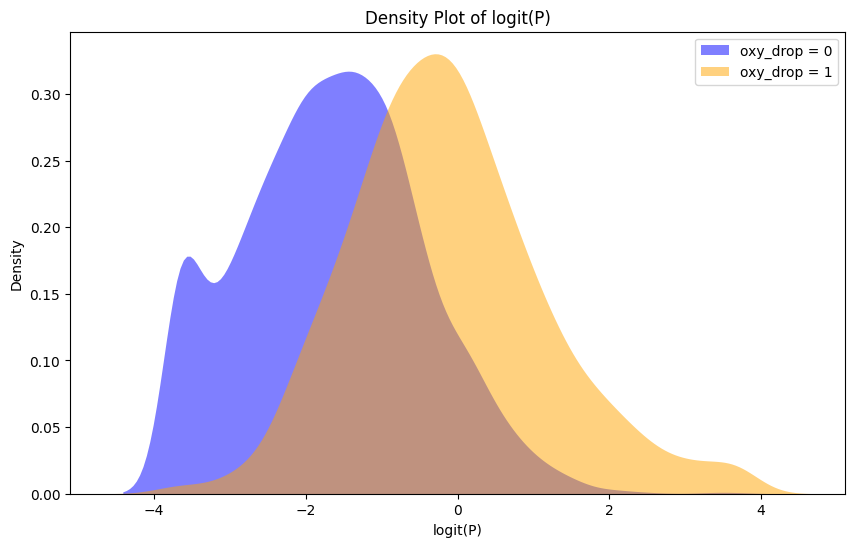

In [59]:
from src.matching import plot_logit_scores

# Run this cell to plot the logits of the propensity scores
plot_logit_scores(propensity_scores, "logit_score_plot.png")

**What does the amount of overlap between these two distributions say about how good your propensity score model is predicting the exposure?** 

**Is it bad if your model has poor performance? (hint: if the exposure happened totally at random, would that help you or hurt you in determining a causal effect?)**

<span style="color:blue;"> 

There is a significant amount of overlap between the 2 distributions, suggesting that there are a group of similar subjects based on the other features excluding oxygenation drop having different outcomes. The propensity score model itself is not performing that well in distinguishing oxygenation drop and stable groups based on the features/covariates. 

The model for propensity score having bad performance in distinguishing groups of oxygenation drop would not necessarily hurt in determining a causal effect between oxygenation drop and mortality, as it could suggests that there is a large group of similar subjects in terms of the covariates (less effect from confounding variables) but different oxygenation drop. As long as the model effectively balances the observed covariates, it will help in determining causal effect later on between oxygenation drop and mortality. 

 </span>

### `3.2.3` (`3 points`) Caliper Matching

The next step of our propensity score analysis is to match patients based on their propensities using Caliper Matching. Caliper Matching involves matching units (patients in this case) within a specified distance (caliper) of each other. The caliper is a threshold that defines the maximum distance between two units' propensity scores for them to be considered a match.


Implement the function `caliper_match` in `matching.py` using the instructions in the docstring. When you are finished, run the following cell.

In [60]:
from src.matching import caliper_match
import warnings
warnings.filterwarnings("ignore")

# Run this cell to perform the matching
match_list = caliper_match(propensity_scores, caliper = 0.25)

# Sanity Check
all_matched_subject_ids = [subject_id for match_pair in match_list for subject_id in match_pair]

if len(all_matched_subject_ids) != len(set(all_matched_subject_ids)):
    warnings.warn("Duplicate subject_id found in all_matched_subject_ids", SanityCheck)

In [61]:
len(all_matched_subject_ids), len(propensity_scores.index.unique())

(1556, 3455)

In [62]:
1556/3455

0.4503617945007236

**How many patients are in the matched set? How does this number compare to the original number of patients in the dataset?**


<span style="color:blue;"> 

There are 1556 patients in the matched set in comparison to the original 3455 patients suggesting that 45% of the original patients in dataset have matched covariates. 

</span>

### `3.2.4` (`5 points`) Matched Outcomes Analysis

Now let's repeat our univariate analysis, but this time only use data from the matched patients.

In [63]:
# TODO: Implement the appropriate test of the options here in this cell
# HINT: You may have implemented a very similar test above
from scipy.stats import ttest_ind, fisher_exact, chi2_contingency, mannwhitneyu

feature_name = 'oxy_drop'
sample_death_in_stay = labels[labels.index.isin(all_matched_subject_ids)]['death_in_stay'].to_numpy()
sample_feature = filtered_features[filtered_features.index.isin(all_matched_subject_ids)][feature_name].to_numpy()

data_crosstab = pd.crosstab(filtered_features[filtered_features.index.isin(all_matched_subject_ids)][feature_name],  
                            labels[labels.index.isin(all_matched_subject_ids)]['death_in_stay'], margins = False)

data_crosstab

death_in_stay,0,1
oxy_drop,,
0,636,142
1,598,180


In [64]:
fisher_exact(data_crosstab)

SignificanceResult(statistic=1.3481558245795846, pvalue=0.020500895885245243)

**What is the p-value?**

**What is the test statistic OR odds ratio?**

<span style="color:blue;"> 

The p-value is 0.0205 and odds ratio is 1.348. 

 </span>

### `3.2.5` (`5 points`) Effect of Caliper Width

"Bias" and "Variance" are concepts that are integral to both machine learning and causal inference, though their implications can be somewhat different depending on the context. (NOTE: Both "Bias" and "Variance" are very overloaded terms! The definitions change depending on the context.)

In the context of discussing a "bias" vs "variance" tradeoff:

- **Bias** refers to the difference between the average prediction of our model and the correct value we are trying to predict. A model is said to have high bias if the model oversimplifies the "true" relationship between the predictors and outcome, generally referred to as "being underfit". Models with high bias often have systematic errors in predictions (errors largely occuring in the same direction with similar magnitude) as the estimates are "biased" away from the true values.

- **Variance** refers to the variability of our model's predictions. A model is said to have high variance if small changes to the training data result in large changes in the predictions. Models with high variance are often **overfit** to the training data, and do not generalize well to new data.



You may find this article from "Towards Data Science" helpful for exploring this concept further: [Understanding the Bias-Variance Tradeoff](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)

In our propensity analysis, we could have had a stricter caliper and enforced that patients had to be more similar to be matched. 

**What would have been the tradeoff in terms of the **bias** and **variance** of utilizing a smaller caliper on our models predictions?**

<span style="color:blue;"> 

A stricter caliper will result in higher bias/lower variance on model predictions, as there are smaller difference in the convariate variables in each matched pair and the models are now learnt to associate the outcome with these variables having small differences. The model will be more sensitive to the small changes in these variables for a smaller amount of matched pairs of patient group. 

 </span>

### `3.2.6` (`5 points`) Including Post-Exposure Data in Propensity Models

Think back to the previous assignment where we produced the dataset we are working with now. All of the information we have for each patient is from before the **index_time**, which by definition is before the **exposure_time**. 

Heres a hypothetical:
Your friend Marc wants to include the "total cost of the patient's hospitalization" as an additional feature in our dataset, and utilize it to fit our propensity model. After looking into his idea, you realize that the "total cost" feature is generated **after** the exposure_time for each patient. 

**What would be the problem with including this feature in our propensity model? Would our inference still be causally valid? Why or why not?**



<span style="color:blue;"> 

It is hardly possible to keep the causal inference valid. First, propensity model is generally used to reduce effects of covariate confounding variables that occur at the same time or before exposure, so that we can try our best to isolate a exposure-only to outcome causal analysis. By including a variable after exposure, we then would risk the post-exposure variable being associated with the exposure, and hence the association between exposure-outcome may be reduced/amplified based on post-exposure's association with exposure. Generally speaking, for causal inference we try to isolate the effect of exposure to outcome only, and hence time ordering of the variables is sensitive. 

 </span>

### `3.2.7` (`5 points`) Lingering Biases


What are some sources of **bias** (still taking about bias in the sense of "bias" vs "variance" tradeoff) that our propensity score analysis cannot correct for?

<span style="color:blue;"> 

1. If the propensity is overfitted on this single set of patient data, then causal inference from downstream analysis may not generalize well to larger populations. Moreover, when there are extreme propensity scores predicted that are either very close to 0 or 1 and if we set the caliper to be very narrow, then it may be hard to find sufficient matching pairs hence causal inference is done on a smaller dataset which may lead to biased conclusion. 

2. In the matching process, we selected the patient with the closest propensity score and exclude all matched pairs for downstream matching of following patients. This may result in lower number of matched pairs and overall subpar matching results. For example, if patient A have 2 patients (C and D) it could be matched with (same score difference) while patient B have only patient C that it could pair with, when patient A is first randomly matched with C (instead of D which have the same propensity difference), patient B now is left out just because it is later in order during matching. Smaller sample size of matched pairs may then result in biased inference analysis. 

 </span>

# `4` (`10 points Extra Credit`) **Optional** Reflection Exercise 

Find a BIOMEDIN 215 classmate who completed Assignment 5 in `R`. 

You'll notice that the results of some of their statistical analyses are quite different from yours. Why do you think that is?

> Hint: there is a very specific design decision early on in the assignment that makes some results differ substantially between the two versions -- if you can find it, we'll give you 10 bonus points!

<span style="color:blue;"> YOUR ANSWER HERE </span>

---

# Feedback (`0 points`)
Please fill out the following [feedback form](https://docs.google.com/forms/d/e/1FAIpQLSevaufyQLf5HAFTStk15OJ5idA5OkdLDMsEp8v-fSoPlXKxow/viewform?usp=sf_link) so we can improve the course for future students!

---

# Submission Instructions ✅

There are two files you must submit for this assignment:

1. A `PDF` of this notebook.
- **Please clear any large cell outputs from executed code cells before creating the PDF.**
    - Including short printouts is fine, but please try to clear any large outputs such as dataframe printouts. This makes it easier for us to grade your assignments!
- To export the notebook to PDF, you may need to first create an HTML version, and then convert it to PDF.

2. A `zip` file containing your code generated by the provided `create_submission_zip.py` script:
- Open the `create_submission_zip.py` file and enter your SUNet ID where indicated.
- Run the script via `python create_submission_zip.py` to generate a file titled `<your_SUNetID>_submission_A5.zip` in the root project directory.
